In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [49]:
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')
features_df=pd.read_csv('features.csv')
stores_df=pd.read_csv('stores.csv')

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [51]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [52]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [53]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [54]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [55]:
features_df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [56]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [57]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [58]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [59]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [60]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [61]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [62]:
dataset_m=features_df.merge(stores_df,how='inner',on='Store')
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [63]:
from datetime import  datetime
dataset_m['Date']=pd.to_datetime(dataset_m['Date'])
test_df['Date']=pd.to_datetime(test_df['Date'])
train_df['Date']=pd.to_datetime(train_df['Date'])

dataset_m['week']=dataset_m.Date.dt.isocalendar().week
dataset_m['year']=dataset_m.Date.dt.isocalendar().year

dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


In [68]:
train_df_1=train_df.merge(dataset_m,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [65]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [81]:
def scatter(train_def_1,column):
  plt.figure()
  plt.scatter(train_df_1[column],train_df_1['Weekly_Sales'])
  plt.xlabel(column)
  plt.ylabel('Weekly_sales')


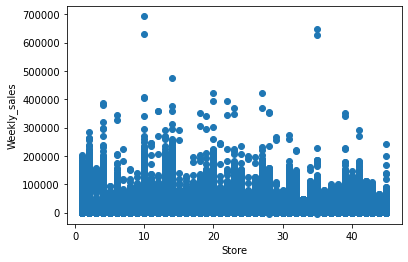

In [82]:
scatter(train_df_1,'Store')

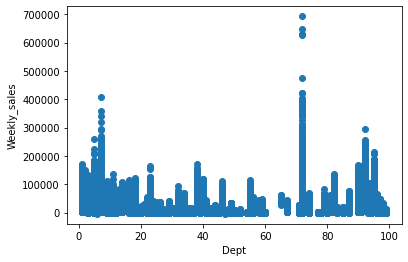

In [83]:
scatter(train_df_1,'Dept')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


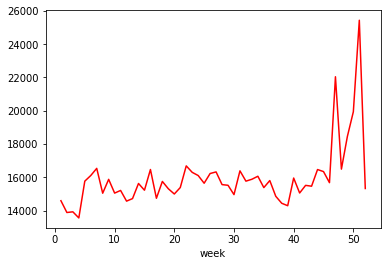

In [85]:
weekly_sales_2011= train_df_1[train_df_1['year']==2011]['Weekly_Sales'].groupby(train_df_1['week']).mean()
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


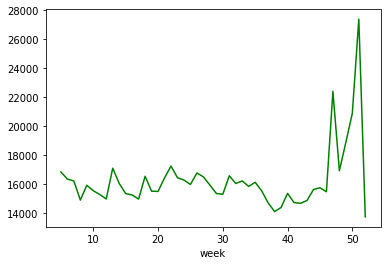

In [86]:
weekly_sales_2010= train_df_1[train_df_1['year']==2010]['Weekly_Sales'].groupby(train_df_1['week']).mean()
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


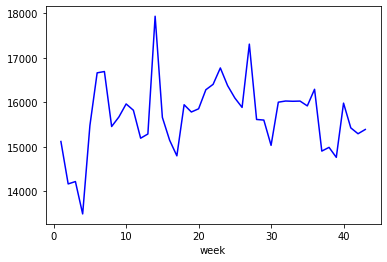

In [87]:
weekly_sales_2012= train_df_1[train_df_1['year']==2012]['Weekly_Sales'].groupby(train_df_1['week']).mean()
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


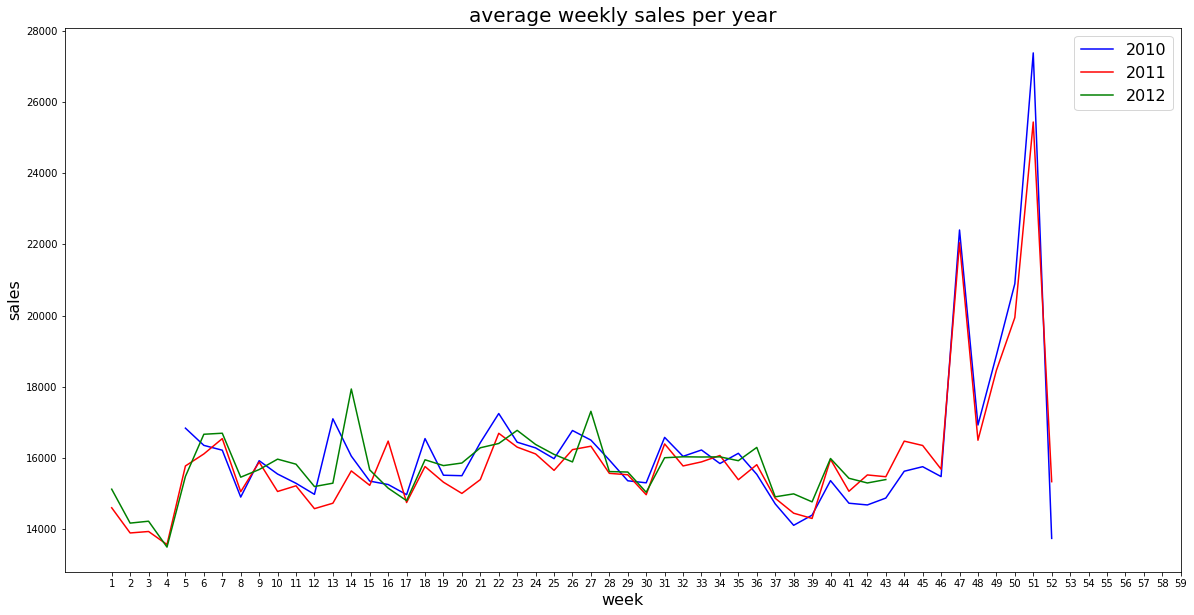

In [89]:
plt.figure(figsize=(20,10))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='blue')
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='red')
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='green')

plt.xticks(np.arange(1,60,step=1))
plt.title('average weekly sales per year',fontsize=20)
plt.xlabel('week',fontsize=16)
plt.ylabel('sales',fontsize=16)
plt.legend(['2010','2011','2012'],fontsize=16)
plt.show()

In [90]:
weekly_sales_store=train_df_1['Weekly_Sales'].groupby(train_df_1['Store']).mean()

In [91]:
weekly_sales_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [92]:
weekly_sales_store_df=pd.DataFrame(weekly_sales_store)

In [93]:
  weekly_sales_store_df.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=98,color='yellow')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


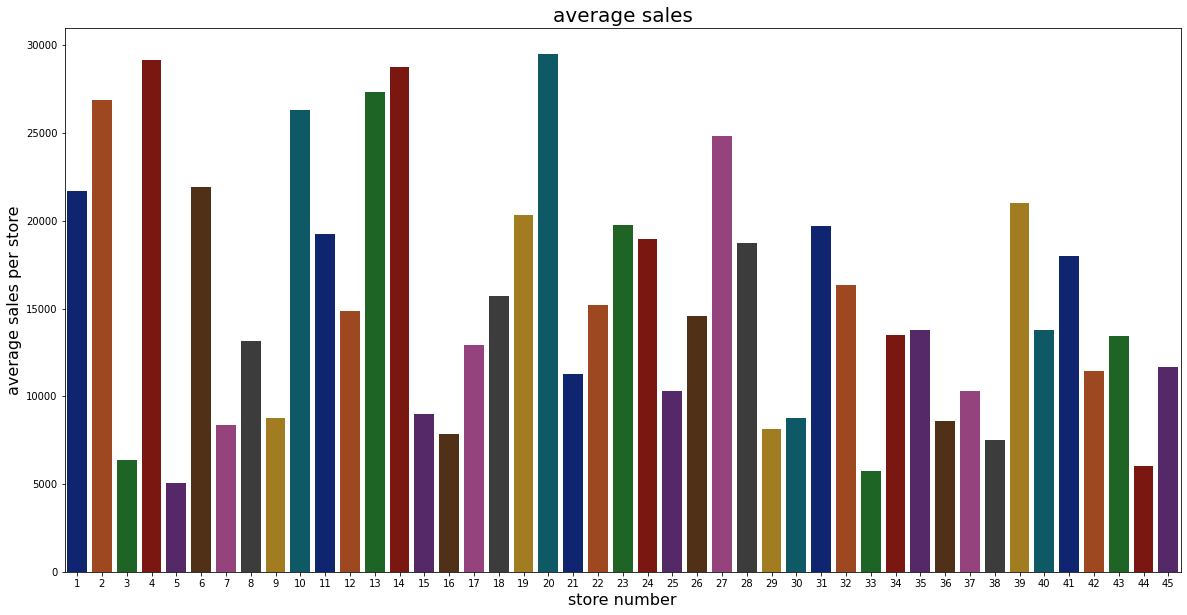

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(weekly_sales_store.index,weekly_sales_store.values,palette='dark')
plt.xlabel('store number',fontsize=16)
plt.ylabel('average sales per store',fontsize=16)
plt.title('average sales',fontsize=20)
plt.show()

In [97]:
weekly_sales_dept=train_df_1['Weekly_Sales'].groupby(train_df_1['Dept']).mean()
weekly_sales_dept_df=pd.DataFrame(weekly_sales_dept)


In [98]:
weekly_sales_dept_df.head()

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515


In [102]:
weekly_sales_dept_df.sort_values("Weekly_Sales",ascending=False).style.bar( align='left',color='red',width=50)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


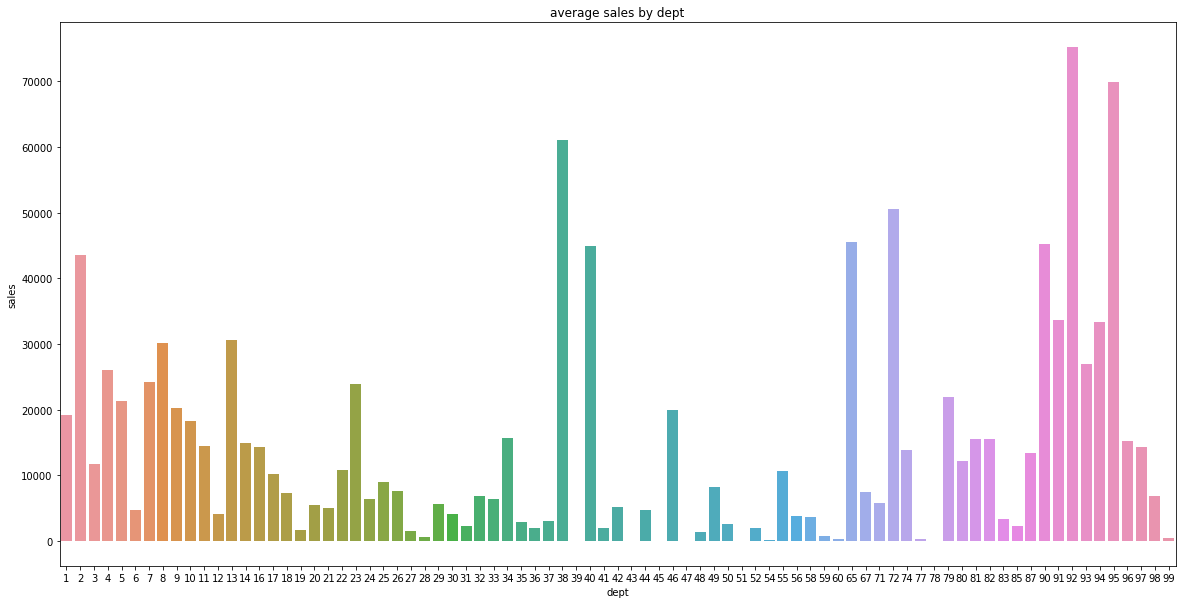

In [103]:
plt.figure(figsize=(20,10))
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values)
plt.title("average sales by dept")
plt.xlabel('dept')
plt.ylabel('sales')
plt.show()